# Import Toolekit

In [1]:
import pandas as pd 
import plotly.express as px
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/EshitaNandy/Uber-Trip-Analysis/master/My%20Uber%20Drives%20-%202016.csv")
df.sample(10)

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
889,11/1/2016 17:35,11/1/2016 17:42,Business,Whitebridge,Whitebridge,1.2,NaN
480,6/27/2016 9:05,6/27/2016 9:33,Business,Covington,Covington,8.6,NaN
622,8/2/2016 19:15,8/2/2016 19:23,Business,Kalorama Triangle,K Street,1.0,NaN
359,5/6/2016 16:45,5/6/2016 16:59,Business,Chapel Hill,Morrisville,17.0,Meeting
554,7/16/2016 15:29,7/16/2016 16:57,Personal,Newland,Boone,41.9,NaN
337,4/29/2016 11:44,4/29/2016 12:01,Business,Cary,Durham,9.9,Meeting
180,3/3/2016 14:44,3/3/2016 14:58,Business,Whitebridge,Northwoods,5.2,Meal/Entertain
727,8/27/2016 16:15,8/27/2016 19:13,Business,Unknown Location,Unknown Location,156.9,NaN
468,6/25/2016 10:18,6/25/2016 10:25,Business,Chalmette,Arabi,1.1,Errand/Supplies
902,11/3/2016 18:51,11/3/2016 19:08,Business,Cary,Morrisville,3.1,Meal/Entertain


# Data Cleaning

## Column Name Cleanup
The original column names contained asterisks (`*`), which made them less readable and inconvenient to reference in code.  
I removed the `*` characters from all column names for a cleaner look and easier handling in data operations.


In [3]:
df.columns

Index(['START_DATE*', 'END_DATE*', 'CATEGORY*', 'START*', 'STOP*', 'MILES*',
       'PURPOSE*'],
      dtype='object')

In [4]:
df.columns=['START_DATE', 'END_DATE', 'CATEGORY', 'START', 'STOP', 'MILES',
       'PURPOSE']
df.head(10)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
5,1/6/2016 17:15,1/6/2016 17:19,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain
6,1/6/2016 17:30,1/6/2016 17:35,Business,West Palm Beach,Palm Beach,7.1,Meeting
7,1/7/2016 13:27,1/7/2016 13:33,Business,Cary,Cary,0.8,Meeting
8,1/10/2016 8:05,1/10/2016 8:25,Business,Cary,Morrisville,8.3,Meeting
9,1/10/2016 12:17,1/10/2016 12:44,Business,Jamaica,New York,16.5,Customer Visit


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [6]:
print(df.isnull().sum())

START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64


In [7]:
df.tail()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NaN


In [8]:
df['PURPOSE'].fillna("unknown",inplace=True)

In [9]:
df.PURPOSE.value_counts()

PURPOSE
unknown            503
Meeting            187
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Moving               4
Airport/Travel       3
Charity ($)          1
Commute              1
Name: count, dtype: int64

In [10]:
df= df[:-1]
df['START_DATE']= pd.to_datetime(df['START_DATE'])
df['END_DATE']= pd.to_datetime(df['END_DATE'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  1155 non-null   datetime64[ns]
 1   END_DATE    1155 non-null   datetime64[ns]
 2   CATEGORY    1155 non-null   object        
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1155 non-null   float64       
 6   PURPOSE     1155 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 63.3+ KB


## Data Cleaning & Type Conversion
- The **last row** represented the *total miles summary*, so it was removed since most of its values were missing.  
- The columns **`START_DATE`** and **`END_DATE`** were converted from `object` to **datetime64** format for easier time-based analysis.  
- The **`PURPOSE`** column had missing values, which were filled appropriately to ensure consistency during analysis.  
- After these steps, the dataset now has **cleaned rows, proper data types**, and **no missing or redundant entries**.


In [12]:
df["Date"]= pd.DatetimeIndex(df["START_DATE"]).date
df["time"]= pd.DatetimeIndex(df["START_DATE"]).hour

df["day_night"]= pd.cut(x= df["time"],
                       bins= [0,10,15,19,24],
                       labels= ['Morning','Afternoon','Evening','Night']
                       )
df.sample(15)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,Date,time,day_night
835,2016-10-19 13:45:00,2016-10-19 13:56:00,Business,SOMISSPO,French Quarter,1.7,unknown,2016-10-19,13,Afternoon
1085,2016-12-21 17:45:00,2016-12-21 17:54:00,Business,Islamabad,Islamabad,2.1,Meeting,2016-12-21,17,Evening
1029,2016-12-08 14:53:00,2016-12-08 15:02:00,Business,Cary,Cary,3.4,Errand/Supplies,2016-12-08,14,Afternoon
528,2016-07-08 10:51:00,2016-07-08 11:12:00,Business,Pontchartrain Beach,CBD,7.0,unknown,2016-07-08,10,Morning
582,2016-07-22 11:11:00,2016-07-22 11:25:00,Business,Morrisville,Cary,5.1,unknown,2016-07-22,11,Afternoon
952,2016-11-13 10:31:00,2016-11-13 10:37:00,Business,Central,Southside,1.9,unknown,2016-11-13,10,Morning
780,2016-09-30 20:59:00,2016-09-30 22:34:00,Business,Islamabad,Unknown Location,16.7,unknown,2016-09-30,20,Night
438,2016-06-13 20:00:00,2016-06-13 20:05:00,Business,Oakland,Unknown Location,5.2,Customer Visit,2016-06-13,20,Night
304,2016-04-08 12:30:00,2016-04-08 12:48:00,Business,Cary,Durham,10.5,Meeting,2016-04-08,12,Afternoon
629,2016-08-05 19:17:00,2016-08-05 19:27:00,Business,Columbia Heights,Kalorama Triangle,1.5,unknown,2016-08-05,19,Evening


## Extracting Date, Time & Time-of-Day Categories
- Extracted the **date** and **hour** components from the `START_DATE` column to enable time-based analysis.  
- Created a new column **`day_night`** that categorizes each trip based on the hour of the day:  
  - **Morning:** 00:00–09:59  
  - **Afternoon:** 10:00–14:59  
  - **Evening:** 15:00–18:59  
  - **Night:** 19:00–23:59  
- This transformation will help analyze ride patterns depending on the **time of day**.


In [13]:
df.drop_duplicates(inplace= True)
df.shape

(1154, 10)

# Visualization 

In [14]:
fig_category = px.histogram(df, x = "CATEGORY", title= 'Category Count')
fig_category.show()
fig_Purpose = px.histogram(df, x = "PURPOSE", title= 'Purpose Count')
fig_Purpose.show()

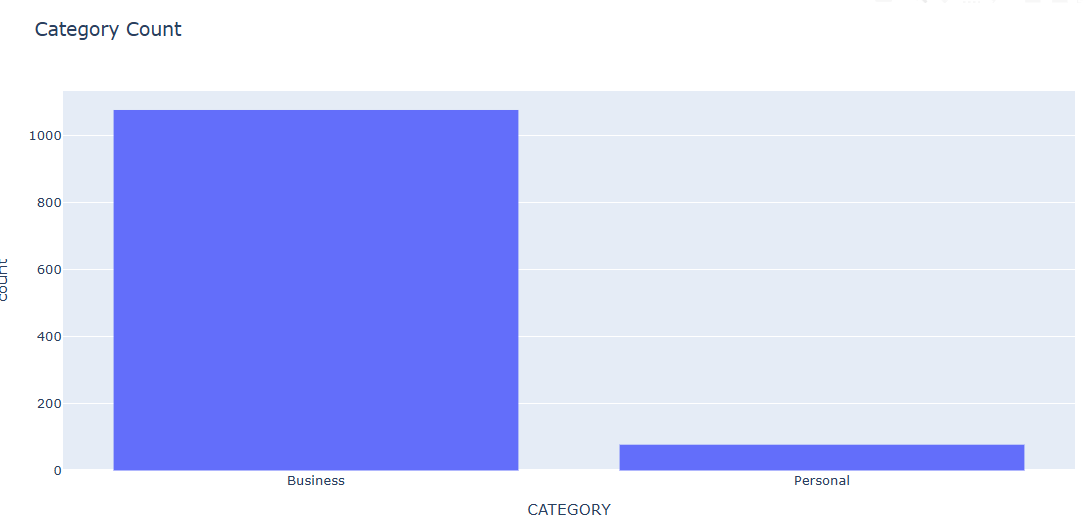

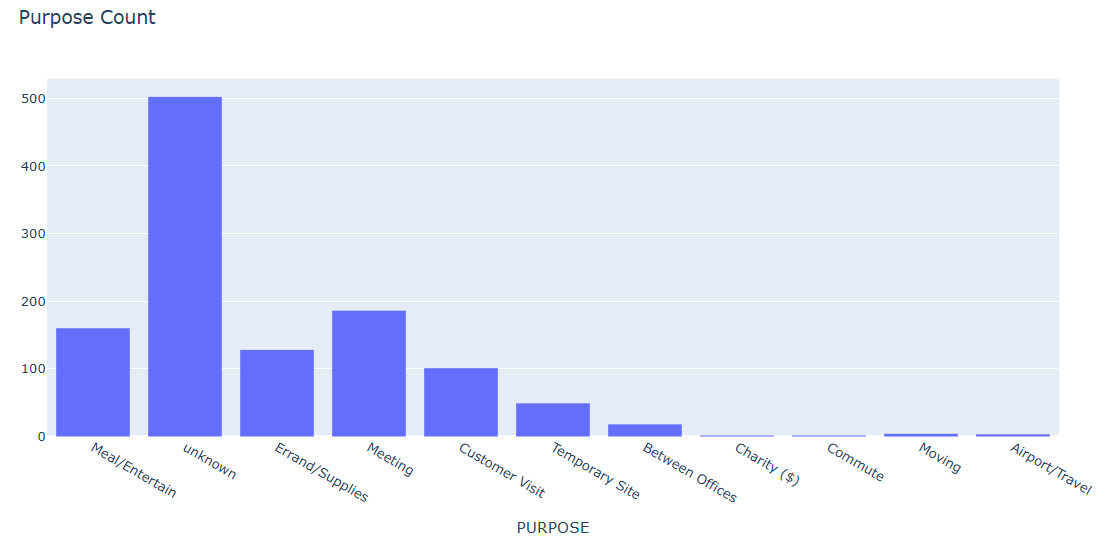

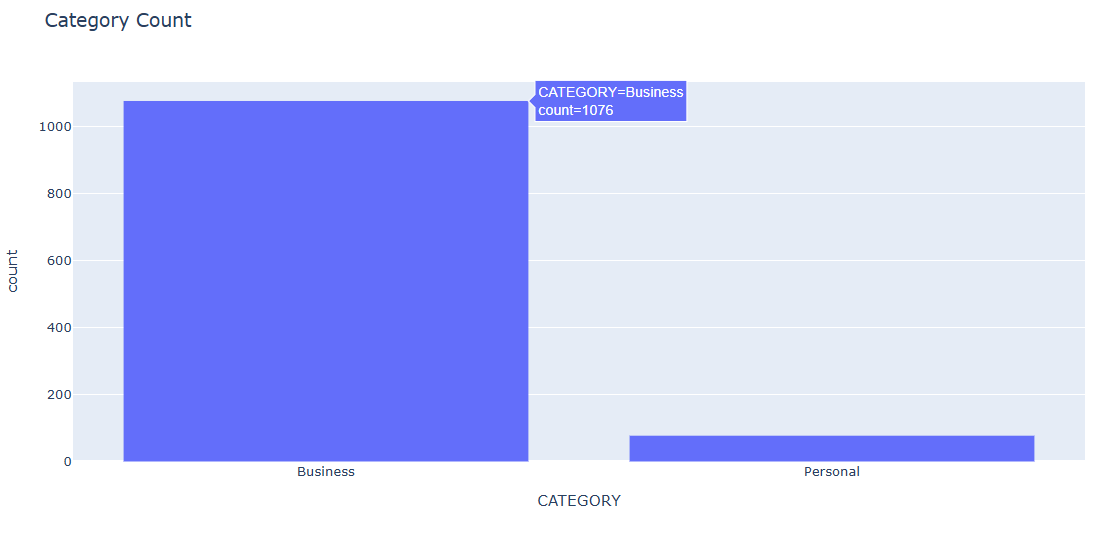
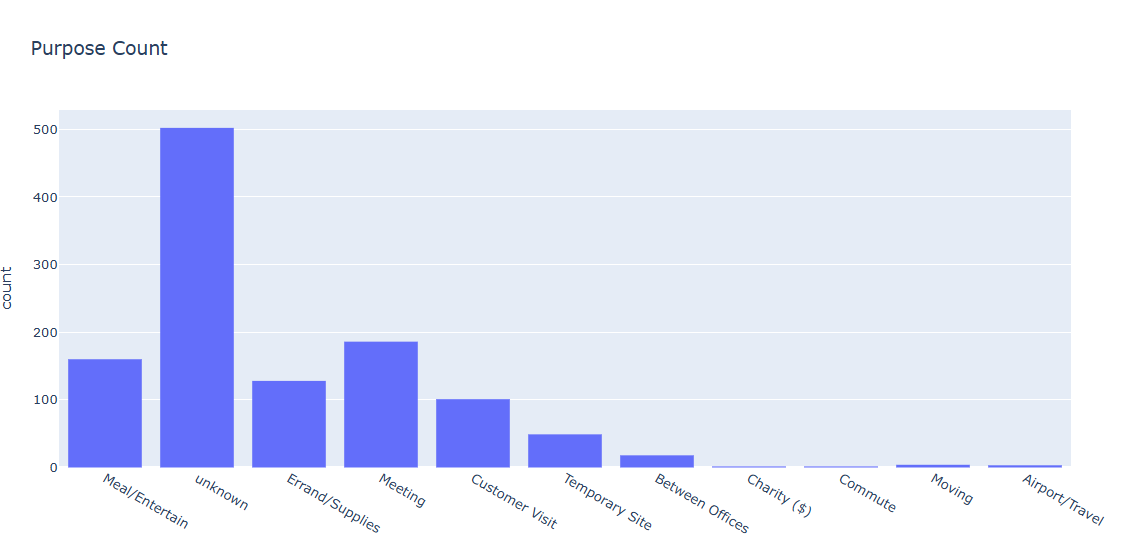
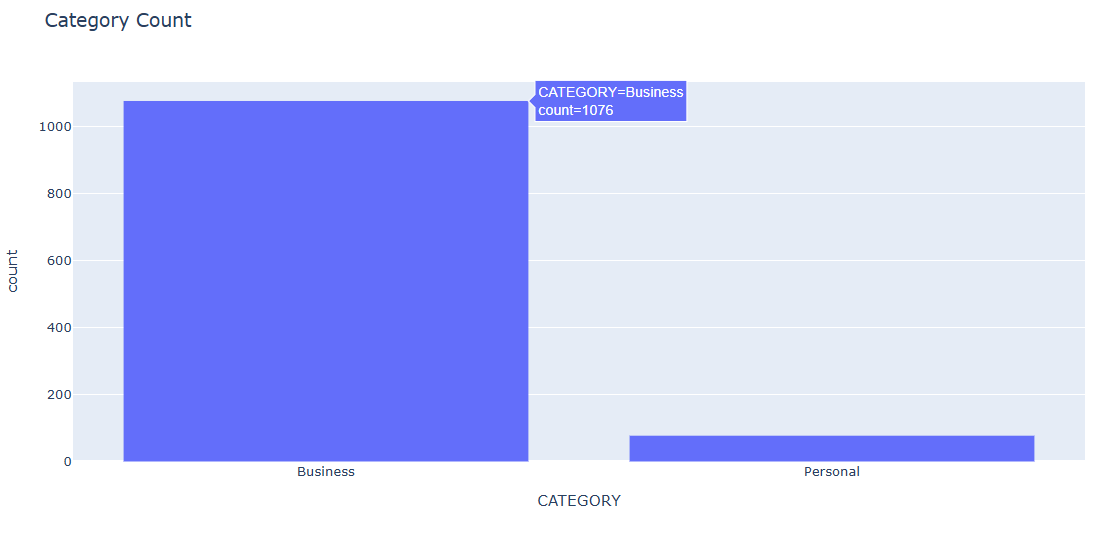
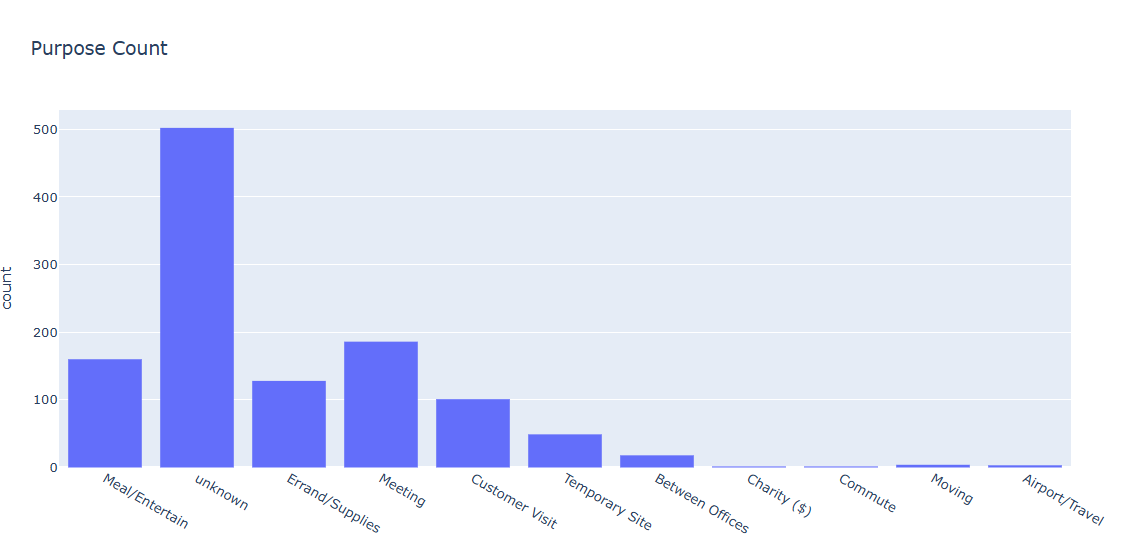

## Trip Category & Purpose Distribution
- The **Category Count** plot shows that the vast majority of trips were for **Business** purposes, with only a small portion classified as **Personal**.  
  → This indicates that the dataset primarily represents **work-related travel behavior**.  

- The **Purpose Count** plot breaks down business trip reasons.  
  - The most frequent category is **“Unknown”**, representing trips where the purpose wasn’t recorded.  
  - Among the defined purposes, **Meetings**, **Meal/Entertainment**, and **Errands/Supplies** are the top three, highlighting common business activities during travel.  

These insights help identify **dominant travel patterns** and emphasize the **importance of proper purpose recording** for more accurate future analyses.


In [15]:
px.histogram(df, x= 'day_night', title = 'Trips by Time of Day')

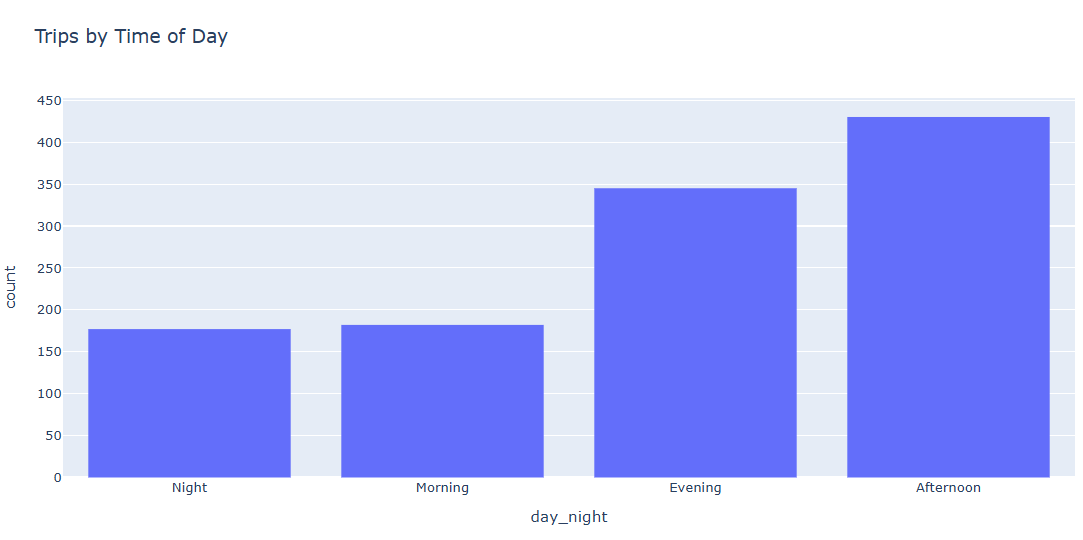


## Trips by Time of Day

- The majority of trips occur during the **Afternoon** and **Evening** hours, suggesting that most Uber usage happens after standard working hours — possibly for meetings, errands, or commutes.  
- **Morning** and **Night** rides are comparatively fewer, indicating lower demand during early or late hours.  
- This trend provides insights into **peak ride periods**, which can help optimize scheduling, pricing, and driver availability.


In [16]:
fig_Purpose_Category = px.histogram(
    df, 
    x= 'PURPOSE',
    color= "CATEGORY",
    barmode= 'group',
    title = 'Purpose Count by category'
)
fig_Purpose_Category.show()

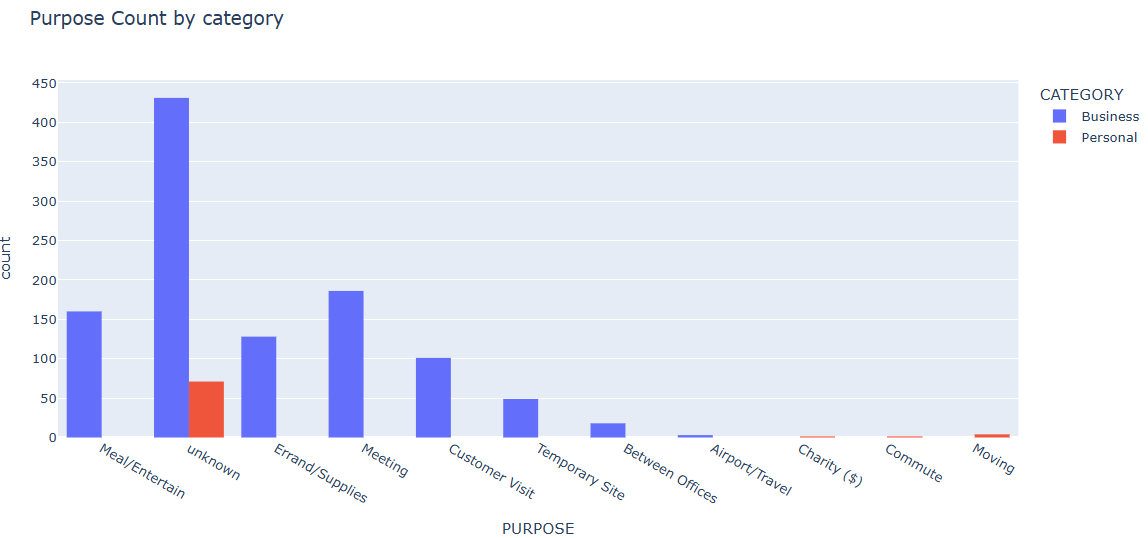

## Purpose Count by Category
- The plot shows how **trip purposes** differ between **Business** and **Personal** categories.  
- Most purposes belong to **Business trips**, especially for **Meetings**, **Meal/Entertainment**, and **Errands/Supplies** — highlighting that work-related travel dominates this dataset.  
- A small number of **Personal trips** appear mainly under **Unknown**, **Charity**, **Commute**, and **Moving**, indicating limited non-work travel records.  
- This suggests that the dataset primarily captures **corporate mobility patterns** rather than everyday personal use.


In [17]:
fig_Purpose_daytime = px.histogram(
    df,
    x= 'PURPOSE',
    color= "day_night",
    barmode= 'group',
    title = 'Purpose Count by day time'
)
fig_Purpose_daytime.show()

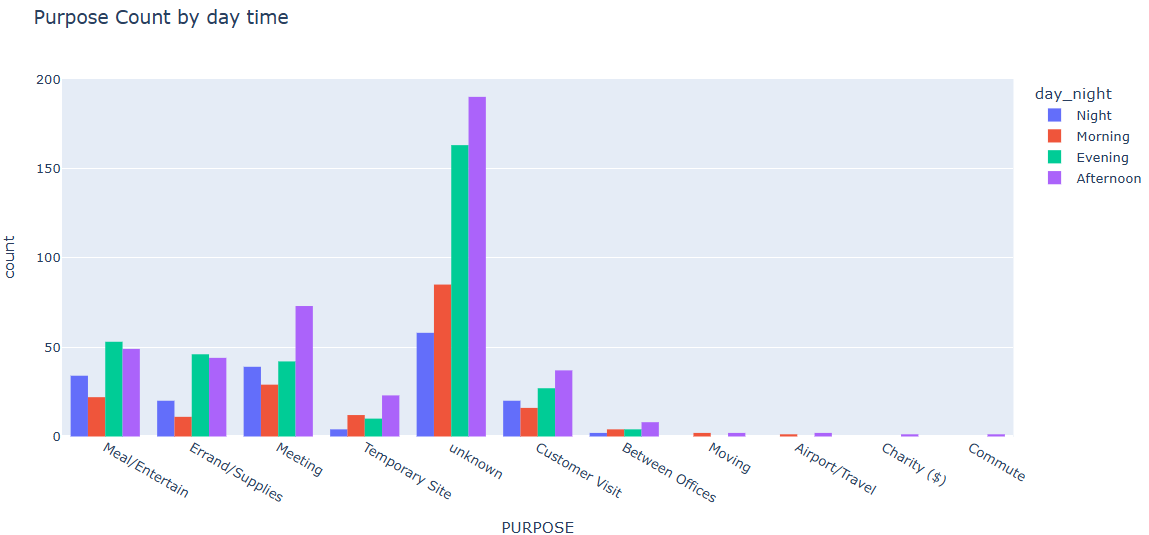


## Purpose Count by Time of Day
- This visualization compares how **trip purposes** vary across different **times of the day** (Morning, Afternoon, Evening, and Night).  
- Most trip purposes occur in the **Afternoon** and **Evening**, showing peak activity during these hours — possibly related to work schedules or post-work tasks.  
- Categories like **Meetings**, **Meal/Entertainment**, and **Errands/Supplies** are more frequent during **daytime hours**, while **Night** trips are significantly fewer across all purposes.  
- The **“Unknown”** purpose remains the most common throughout all periods, indicating missing data or unclassified trip intents.


In [18]:
df['MONTH'] = pd.DatetimeIndex(df['START_DATE']).month

month_labels = {
    1.0: 'Jan', 2.0: 'Feb', 3.0: 'Mar', 4.0: 'Apr',
    5.0: 'May', 6.0: 'Jun', 7.0: 'Jul', 8.0: 'Aug',
    9.0: 'Sep', 10.0: 'Oct', 11.0: 'Nov', 12.0: 'Dec'
}

df['MONTH'] = df['MONTH'].map(month_labels)

month_counts = df['MONTH'].value_counts(sort=False)

month_summary = pd.DataFrame({
    "MONTHS": month_counts.index,
    "RIDE COUNT": month_counts.values,
    "MAX MILES": df.groupby('MONTH', sort=False)['MILES'].sum()
})


In [19]:
month_summary


,MONTHS,RIDE COUNT,MAX MILES
MONTH,,,
Jan,Jan,61,512.9
Feb,Feb,115,908.2
Mar,Mar,113,1693.9
Apr,Apr,54,1113.0
May,May,49,363.8
Jun,Jun,107,832.9
Jul,Jul,112,1224.6
Aug,Aug,133,1335.5
Sep,Sep,36,601.8


In [20]:
plot_df = month_summary.melt(
    id_vars='MONTHS',
    value_vars=['RIDE COUNT', 'MAX MILES'], 
    var_name='Metric',
    value_name='Value'
)

fig = px.line(
    plot_df,
    x='MONTHS',
    y='Value',
    color='Metric',
    markers=True,
    title='Monthly Ride Count vs. Total Trips Miles'
)

fig.update_layout(
    xaxis_title='Month',
    yaxis_title='Value',
    legend_title_text='Metric'
)

fig.show()


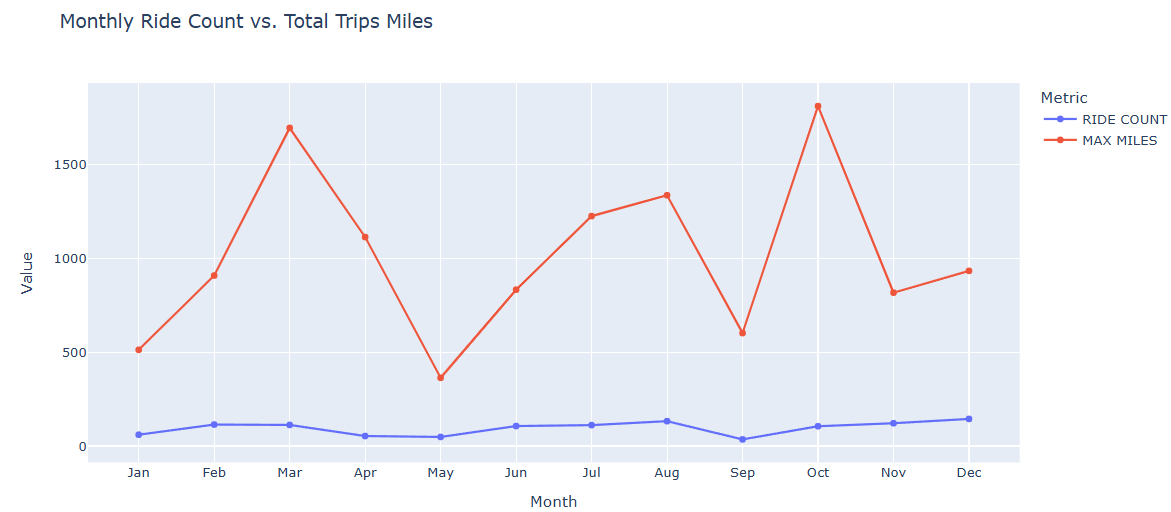

## Monthly Ride Count vs. Total Trip Miles

This visualization shows the **relationship between ride frequency and total travel distance** throughout the year.

- According to the dataset, **December** recorded the **highest number of rides (145)**, while **September** had the **fewest (36)**.  
- However, when looking at total miles traveled, **October (1810 mi)** and **March (1693.9 mi)** stand out — indicating months with **longer-distance trips** rather than higher ride counts.  
- This suggests that the **number of rides and total distance are not directly correlated**: some months (like March and October) had fewer but longer trips, while others (like December) had more frequent but shorter ones.  
- Overall, the pattern highlights **seasonal variability** in travel behavior — with peaks around **spring and late autumn**, possibly linked to business activity cycles or travel seasons.


In [21]:
df['Day']= df['START_DATE'].dt.weekday
daylabel= {
    0:'Mon', 1:"Tues", 2:"Wed",3:"Thus", 4:"Fri", 5:"Sat", 6:"Sun" 
}
df['Day']=df['Day'].map(daylabel)
df['Day'].sample(15)

127     Fri
107     Sun
88     Tues
758    Tues
147     Sun
895     Wed
143     Sat
991    Tues
618     Mon
385     Fri
978     Sat
202     Mon
424     Fri
797     Fri
995     Wed
Name: Day, dtype: object

In [22]:
px.histogram(df, x="Day", title= "Trip Frequency Across Days of the Week")

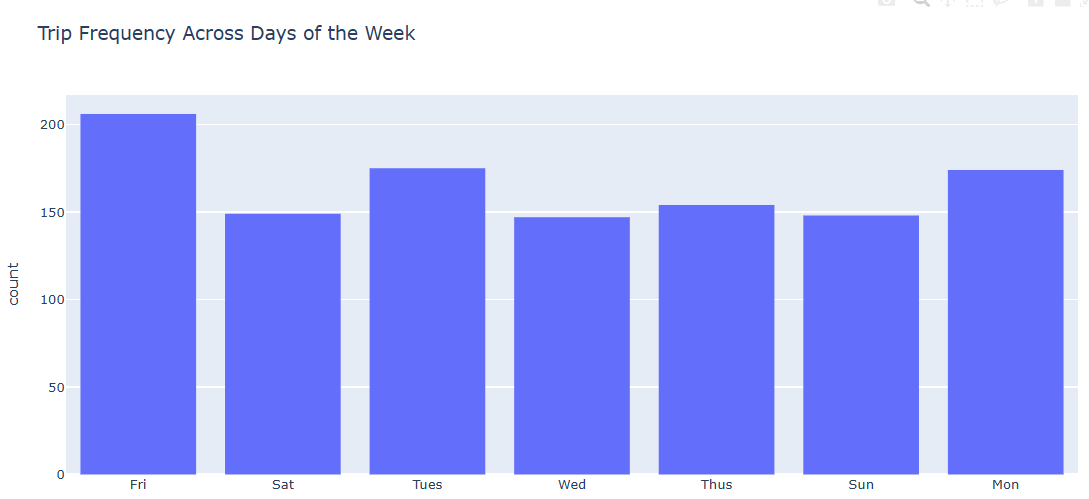
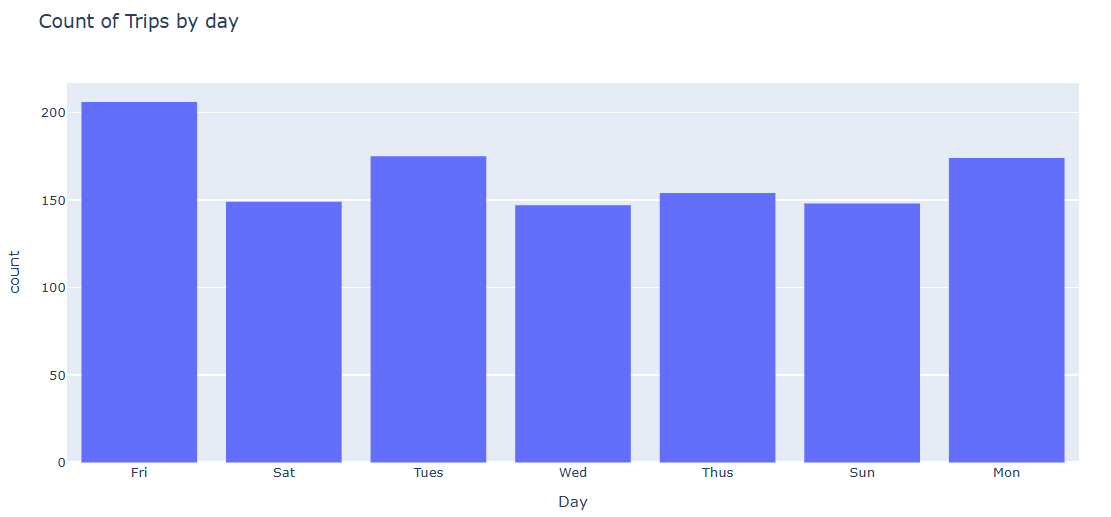

## Trip Frequency Across Days of the Week
- This visualization shows how the number of Uber trips varies throughout the week.  
- **Friday** records the **highest trip frequency**, indicating a surge in travel before the weekend — likely due to business closures, social outings, or early weekend plans.  
- **Monday** and **Tuesday** also show strong activity, reflecting regular commuting and business-related travel.  
- The **weekend (Saturday & Sunday)** sees a noticeable drop in trips, suggesting reduced work-related movement and fewer scheduled rides.  
- Overall, ride demand remains **highest during weekdays**, with a clear **Friday peak** and a **weekend slowdown**.


# Overall Insights from the Analysis

This analysis explores Uber trip patterns across **time, distance, purpose, and category** to uncover user behavior trends.

- 🔹 **Dominant Purpose:** The majority of trips were **Business-related**, especially for **Meetings**, **Errands/Supplies**, and **Meal/Entertainment**. Personal trips represented only a small share of the total rides.  
- 🔹 **Purpose Distribution:** Over **500 trips** had an **“Unknown”** purpose, highlighting potential gaps or missing data in trip classification.  
- 🔹 **Time of Day Trends:** Most rides occurred during the **Afternoon and Evening**, aligning with typical working hours and post-work activities.  
- 🔹 **Weekly Patterns:** **Friday** had the highest number of trips, while **weekends** (Saturday & Sunday) showed fewer rides — suggesting the dataset mainly reflects **work-related mobility**.  
- 🔹 **Monthly Insights:**  
  - **December** recorded the **highest number of trips (145)**, likely due to increased year-end activity.  
  - **October (1810 mi)** and **March (1693.9 mi)** showed the **longest total distances**, indicating months with longer travel rather than more frequent rides.  
- 🔹 **Trip Distance:** Although ride frequency stayed relatively stable, the **total miles fluctuated sharply**, showing that **trip length varies more than ride count** across months.  
- 🔹 **Data Quality Improvements:** Column names were standardized, missing values (especially in the `PURPOSE` column) were filled, and date-time columns were converted for accurate temporal analysis.

**📈 In summary:**  
Uber trips in this dataset are predominantly **business-oriented**, with activity peaking on **weekdays**, especially **Fridays** and **afternoons**. While ride counts remain consistent, **trip distances vary widely**, suggesting that **when people travel** is stable — but **how far they go** changes with business seasons and travel demand.
